A并不需要知道，因为在分子分母中会被消去

In [1]:
import numpy as np
from numpy.random import default_rng
import matplotlib.pyplot as plt

生成器部分代码：

In [26]:
rng = default_rng()

def r_fx_fy(x, y):
    return np.exp(-(x**2 - y**2)/2)

# 总步数
N = 100000
# 每一步的步长范围
delta = 2.5
# 方差稳定检验变量
test = 0
#记录步数
n_accept = 0
# 起点
x0 = 0
walk_path = [x0]
while(True):
    for i in range(N):
        # 取一个试探位置
        x_try = rng.uniform(x0-delta, x0+delta)
        # 计算r，判断是否接受
        r = r_fx_fy(x_try, x0)
        if r > 1:
            x0 = x_try
            walk_path.append(x0)
            n_accept += 1
            var = np.var(np.array(walk_path))
            continue
        if r >= rng.random():
            x0 = x_try
            walk_path.append(x0)
            n_accept += 1
            continue
        walk_path.append(x0)
    var = np.var(np.array(walk_path))
    # 方差稳定性检验
    if( var > 0.95 and var < 1.05):  test += 1 
    print(f"we have test={test}")
    if(test == 3): break

print(f"n_accept/N={n_accept/N:.4},var={var}")

KeyboardInterrupt: 

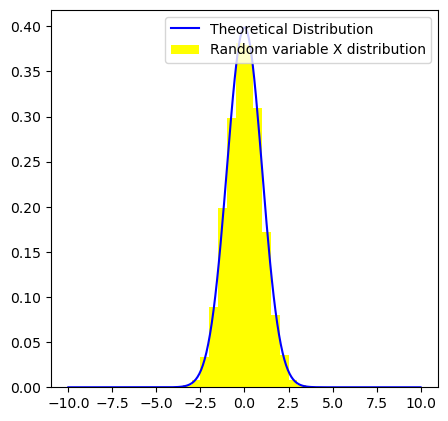

In [22]:
# 理论密度曲线
def guass(x):
    return np.exp(-x**2/2)/np.sqrt(2*np.pi)

x = np.linspace(-10, 10, 200)
y = guass(x)

plt.figure(figsize=(5, 5), dpi=100)
plt.hist(walk_path, bins=40, range=(-10.0, 10.0), density=True, color='yellow', label='Random variable X distribution')
plt.plot(x, y, color='blue', label='Theoretical Distribution')
plt.legend(loc='upper right')
plt.show()